<a href="https://colab.research.google.com/github/mriared/Entropy-of-abstracts-and-the-citations-relationship/blob/main/Datasets_prepocessing_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Loading data sets with Nature abstracts from years 2016-2019

In [ ]:
#df_20 = pd.read_csv('/content/Abstracts-Nature-2020.csv')
df_19 = pd.read_csv('/content/Abstract-Nature-all-2019.csv')
df_18 = pd.read_csv('/content/Abstracts-nature-2018.csv')
df_17 = pd.read_csv('/content/Abstracts-Nature-2017.csv')
df_16 = pd.read_csv('/content/Abstracts-Nature-2016.csv')

In [ ]:
print(f"Columns 2016: {df_16.columns}, 2017: {df_17.columns}, 2018: {df_18.columns}, 2019: {df_19.columns}") #, 2020: {df_20.columns}")

Columns 2016: Index(['web-scraper-order', 'web-scraper-start-url', 'URL', 'URL-href',
       'abstract', 'Citations'],
      dtype='object'), 2017: Index(['web-scraper-order', 'web-scraper-start-url', 'URL', 'URL-href',
       'abstract', 'citations'],
      dtype='object'), 2018: Index(['web-scraper-order', 'web-scraper-start-url', 'URL', 'URL-href',
       'abstract', 'citations'],
      dtype='object'), 2019: Index(['web-scraper-order', 'web-scraper-start-url', 'URL', 'URL-href',
       'abstracts', 'citations'],
      dtype='object')


In [ ]:
# Prepering for concatenation - renaming columns
df_19 = df_19.rename(columns={'abstracts': 'abstract'})
df_16 = df_16.rename(columns={'Citations': 'citations'})
#df_20 = df_20.rename(columns={'title': 'URL'})

In [ ]:
#Getting subsets for concatination
#df_20_subset = df_20[['URL', 'abstract', "citations"]]
df_19_subset = df_19[['URL', 'abstract', "citations"]]
df_18_subset = df_18[['URL', 'abstract', "citations"]]
df_17_subset = df_17[['URL', 'abstract', "citations"]]
df_16_subset = df_16[['URL', 'abstract', "citations"]]

In [ ]:
#Concatinating all Nature abstracts
nature_df_16to19 = pd.concat([df_19_subset, df_18_subset, df_17_subset, df_16_subset], ignore_index=True)

In [ ]:
nature_df_16to19

,URL,abstract,citations
0,Brain regulatory T cells suppress astrogliosis and potentiate neurological recovery,"In addition to maintaining immune tolerance, FOXP3+ regulatory T (Treg) cells perform specialized functions in tissue homeostasis and remodelling1,2. However, the characteristics and functions of brain Treg cells are not well understood because there is a low number of Treg cells in the brain under normal conditions. Here we show that there is massive accumulation of Treg cells in the mouse brain after ischaemic stroke, and this potentiates neurological recovery during the chronic phase of ischaemic brain injury. Although brain Treg cells are similar to Treg cells in other tissues such as visceral adipose tissue and muscle3,4,5, they are apparently distinct and express unique genes related to the nervous system including Htr7, which encodes the serotonin receptor 5-HT7. The amplification of brain Treg cells is dependent on interleukin (IL)-2, IL-33, serotonin and T cell receptor recognition, and infiltration into the brain is driven by the chemokines CCL1 and CCL20. Brain Treg cells suppress neurotoxic astrogliosis by producing amphiregulin, a low-affinity epidermal growth factor receptor (EGFR) ligand. Stroke is a leading cause of neurological disability, and there are currently few effective recovery methods other than rehabilitation during the chronic phase. Our findings suggest that Treg cells and their products may provide therapeutic opportunities for neuronal protection against stroke and neuroinflammatory diseases.",406 Citations
1,Genomic encoding of transcriptional burst kinetics,"Mammalian gene expression is inherently stochastic1,2, and results in discrete bursts of RNA molecules that are synthesized from each allele3,4,5,6,7. Although transcription is known to be regulated by promoters and enhancers, it is unclear how cis-regulatory sequences encode transcriptional burst kinetics. Characterization of transcriptional bursting, including the burst size and frequency, has mainly relied on live-cell4,6,8 or single-molecule RNA fluorescence in situ hybridization3,5,8,9 recordings of selected loci. Here we determine transcriptome-wide burst frequencies and sizes for endogenous mouse and human genes using allele-sensitive single-cell RNA sequencing. We show that core promoter elements affect burst size and uncover synergistic effects between TATA and initiator elements, which were masked at mean expression levels. Notably, we provide transcriptome-wide evidence that enhancers control burst frequencies, and demonstrate that cell-type-specific gene expression is primarily shaped by changes in burst frequencies. Together, our data show that burst frequency is primarily encoded in enhancers and burst size in core promoters, and that allelic single-cell RNA sequencing is a powerful model for investigating transcriptional kinetics.",253 Citations
2,Cryo-EM structure of the human α1β3γ2 GABAA receptor in a lipid bilayer,"Type A γ-aminobutyric acid (GABAA) receptors are pentameric ligand-gated ion channels and the main drivers of fast inhibitory neurotransmission in the vertebrate nervous system1,2. Their dysfunction is implicated in a range of neurological disorders, including depression, epilepsy and schizophrenia3,4. Among the numerous assemblies that are theoretically possible, the most prevalent in the brain are the α1β2/3γ2 GABAA receptors5. The β3 subunit has an important role in maintaining inhibitory tone, and the expression of this subunit alone is sufficient to rescue inhibitory synaptic transmission in β1–β3 triple knockout neurons6. So far, efforts to generate accurate structural models for heteromeric GABAA receptors have been hampered by the use of engineered receptors and the presence of detergents7,8,9. Notably, some recent cryo-electron microscopy reconstructions have reported ‘collapsed’ conformations8,9; however, these disagree with the structure of the prototypical pentameric ligand-gated ion channe

In [ ]:
nature_df_16to19 = nature_df_16to19.rename(columns={"URL":"title"})

In [ ]:
def dataprep(df):
  df = df.rename(columns={"URL":"title"})
  df = df.drop_duplicates('title')
  df = df.drop_duplicates('abstract')
  df.dropna(subset=['abstract'], inplace=True)

  return df

In [ ]:
#Inspecting duplicated rows
nature_df_16to19[nature_df_16to19.duplicated('title', keep=False)].sort_values('title')

,title,abstract,citations
2612,Autophagy maintains stemness by preventing senescence,NaN,849 Citations
3153,Autophagy maintains stemness by preventing senescence,NaN,5 Citations
3115,Collinge et al. reply,NaN,2 Citations
3281,Collinge et al. reply,NaN,1 Citations
2194,Dong et al. reply,NaN,3 Citations
2195,Dong et al. reply,NaN,2 Citations
2196,Dong et al. reply,NaN,3 Citations
2197,Dong et al. reply,NaN,1 Citations
2198,Dong et al. reply,NaN,1 Citations
3246,Lyons et al. reply,NaN,13 Altmetric


In [ ]:
nature_df_16to19 = dataprep(nature_df_16to19)

<Axes: >

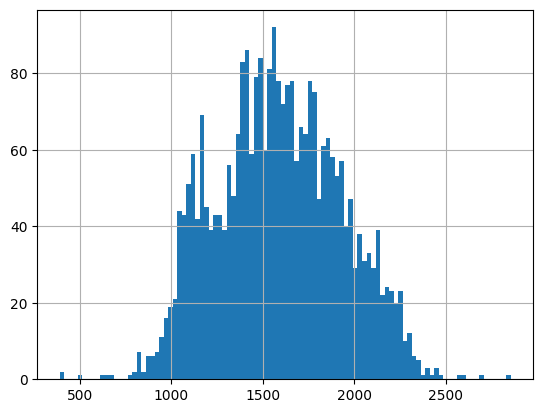

In [ ]:
nature_df_16to19['abstract_len'] = nature_df_16to19['abstract'].apply(len)
nature_df_16to19['abstract_len'].hist(bins=100)

In [ ]:
#Inspecting the shortest abstracts
nature_df_16to19.sort_values('abstract_len')[:10]

,title,abstract,citations,abstract_len
2948,Reproducible pharmacogenomic profiling of cancer cell line panels,"The use of large-scale genomic and drug response screening of cancer cell lines depends crucially on the reproducibility of results. Here we consider two previously published screens, plus a later critique of these studies. Using independent data, we show that consistency is achievable, and provide a systematic description of the best laboratory and analysis practices for future studies.",184 Citations,390
1007,Adolescence and the next generation,"Adolescent growth and social development shape the early development of offspring from preconception through to the post-partum period through distinct processes in males and females. At a time of great change in the forces shaping adolescence, including the timing of parenthood, investments in today’s adolescents, the largest cohort in human history, will yield great dividends for future generations.",209 Citations,404
2167,T cells from patients with Parkinson’s disease recognize α-synuclein peptides,"Genetic studies have shown the association of Parkinson’s disease with alleles of the major histocompatibility complex1,2,3. Here we show that a defined set of peptides that are derived from α-synuclein, a protein aggregated in Parkinson’s disease4, act as antigenic epitopes displayed by these alleles and drive helper and cytotoxic T cell responses in patients with Parkinson’s disease. These responses may explain the association of Parkinson’s disease with specific major histocompatibility complex alleles.",521 Citations,511
1459,A Triassic stem turtle with an edentulous beak,"The early evolution of turtles continues to be a contentious issue in vertebrate palaeontology. Recent reports have suggested that they are diapsids1,2,3,4,5,6, but the position of turtles within Diapsida is controversial7,8,9,10,11,12 and the sequence of acquisition of turtle synapomorphies remains unclear1,2,3. Here we describe a Triassic turtle from China that has a mixture of derived characters and plesiomorphic features. To our knowledge, it represents the earliest known stem turtle with an edentulous beak and a rigid puboischiadic plate. The discovery of this new form reveals a complex early history of turtles.",43 Citations,624
383,Climate as a risk factor for armed conflict,"Research findings on the relationship between climate and conflict are diverse and contested. Here we assess the current understanding of the relationship between climate and conflict, based on the structured judgments of experts from diverse disciplines. These experts agree that climate has affected organized armed conflict within countries. However, other drivers, such as low socioeconomic development and low capabilities of the state, are judged to be substantially more influential, and the mechanisms of climate–conflict linkages remain a key uncertainty. Intensifying climate change is estimated to increase future risks of conflict.",274 Citations,643
3253,On-target efficacy of a HIF-2α antagonist in preclinical kidney cancer models,"Clear cell renal cell carcinoma, the most common form of kidney cancer, is usually linked to inactivation of the pVHL tumour suppressor protein and consequent accumulation of the HIF-2α transcription factor (also known as EPAS1)1. Here we show that a small molecule (PT2399) that directly inhibits HIF-2α causes tumour regression in preclinical mouse models of primary and metastatic pVHL-defective clear cell renal cell carcinoma in an on-target fashion. pVHL-defective clear cell renal cell carcinoma cell lines display unexpectedly variable sensitivity to PT2399, however, suggesting the need for predictive biomarkers to be developed to use this approach optimally in the clinic.",293 Citations,683
1210,Emerging trends in global freshwater availability,"Freshwater availability is changing worldwide. Here we quantify 34 trends in terrestrial water storage observed by the Gravity Recovery and Climate

In [ ]:
#Revmoving the word "Citation" from the citations
nature_df_16to19['citations'] = pd.to_numeric(nature_df_16to19['citations'].str.replace(' Citations', '', regex=False), errors='coerce').fillna(0)

In [ ]:
#sorting by the citations
nature_df_16to19 = nature_df_16to19.sort_values(by='citations', ascending=False)
nature_df_16to19 = nature_df_16to19.reset_index(drop=True)

In [ ]:
nature_df_16to19

,title,abstract,citations,abstract_len
0,Dermatologist-level classification of skin cancer with deep neural networks,"Skin cancer, the most common human malignancy1,2,3, is primarily diagnosed visually, beginning with an initial clinical screening and followed potentially by dermoscopic analysis, a biopsy and histopathological examination. Automated classification of skin lesions using images is a challenging task owing to the fine-grained variability in the appearance of skin lesions. Deep convolutional neural networks (CNNs)4,5 show potential for general and highly variable tasks across many fine-grained object categories6,7,8,9,10,11. Here we demonstrate classification of skin lesions using a single CNN, trained end-to-end from images directly, using only pixels and disease labels as inputs. We train a CNN using a dataset of 129,450 clinical images—two orders of magnitude larger than previous datasets12—consisting of 2,032 different diseases. We test its performance against 21 board-certified dermatologists on biopsy-proven clinical images with two critical binary classification use cases: keratinocyte carcinomas versus benign seborrheic keratoses; and malignant melanomas versus benign nevi. The first case represents the identification of the most common cancers, the second represents the identification of the deadliest skin cancer. The CNN achieves performance on par with all tested experts across both tasks, demonstrating an artificial intelligence capable of classifying skin cancer with a level of competence comparable to dermatologists. Outfitted with deep neural networks, mobile devices can potentially extend the reach of dermatologists outside of the clinic. It is projected that 6.3 billion smartphone subscriptions will exist by the year 2021 (ref. 13) and can therefore potentially provide low-cost universal access to vital diagnostic care.",7133.0,1763
1,Unconventional superconductivity in magic-angle graphene superlattices,"The behaviour of strongly correlated materials, and in particular unconventional superconductors, has been studied extensively for decades, but is still not well understood. This lack of theoretical understanding has motivated the development of experimental techniques for studying such behaviour, such as using ultracold atom lattices to simulate quantum materials. Here we report the realization of intrinsic unconventional superconductivity—which cannot be explained by weak electron–phonon interactions—in a two-dimensional superlattice created by stacking two sheets of graphene that are twisted relative to each other by a small angle. For twist angles of about 1.1°—the first ‘magic’ angle—the electronic band structure of this ‘twisted bilayer graphene’ exhibits flat bands near zero Fermi energy, resulting in correlated insulating states at half-filling. Upon electrostatic doping of the material away from these correlated insulating states, we observe tunable zero-resistance states with a critical temperature of up to 1.7 kelvin. The temperature–carrier-density phase diagram of twisted bilayer graphene is similar to that of copper oxides (or cuprates), and includes dome-shaped regions that correspond to superconductivity. Moreover, quantum oscillations in the longitudinal resistance of the material indicate the presence of small Fermi surfaces near the correlated insulating states, in analogy with underdoped cuprates. The relatively high superconducting critical temperature of twisted bilayer graphene, given such a small Fermi surface (which corresponds to a carrier density of about 1011 per square centimetre), puts it among the superconductors with the strongest pairing strength between electrons. Twisted bilayer graphene is a precisely tunable, purely carbon-based, two-dimensional superconductor. It is therefore an ideal material for investigations of strongly correlated phenomena, which could lead to insights into the physics of high-critical-temperature superconductors and quantum spin liquids

In [ ]:
nature_df_16to19.shape

(2841, 4)

In [ ]:
nature_df_16to19.to_csv('nature 16to19.csv', index=False)

##Preparing data sets from different journals

In [ ]:
scopus_most_1 = pd.read_csv('/content/scopus_most_cited_1.csv')
scopus_least_1 = pd.read_csv('/content/scopus_least_cited.csv')

In [ ]:
scopus_all = pd.concat([scopus_most_1, scopus_least_1])

In [ ]:
scopus_all.columns

Index(['Title', 'Year', 'Source title', 'Cited by', 'Link', 'Abstract'], dtype='object')

In [ ]:
scopus_all = scopus_all.rename(columns={'Source title': 'journal', 'Abstract': 'abstract','Title':'title', "Cited by": "citations"})

In [ ]:
#Removing "Nature" journals from the non-Nature set
def removeNature(df):
  mask = df['journal'].str.startswith('Nature')
  df = df[~mask]

  return df

In [ ]:
scopus_all = removeNature(scopus_all)

In [ ]:
scopus_all = dataprep(scopus_all)

In [ ]:
scopus_all.shape

(3543, 6)

##Inspecting the abstracts (if they have any artifacts) e.g. "© 2017 American Chemical Society."

###Preparing the whole data set

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
scopus_all["abstract"].head(50)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
#Removing the last sentences of the abstract to clean the text
def remove_last_two_sentences(abstract):
    sentences = nltk.sent_tokenize(abstract)
    if len(sentences) > 1:
        abstract = ' '.join(sentences[:-2])
    return abstract

In [ ]:
scopus_all.iloc[55]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Physics-informed neural networks: A deep learning framework for solving forward and inverse problems invol

In [ ]:
scopus_all['abstract'] = scopus_all['abstract'].apply(remove_last_two_sentences)

In [ ]:
scopus_all.iloc[55]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations
Year                                                                                                                                                                                          

<Axes: >

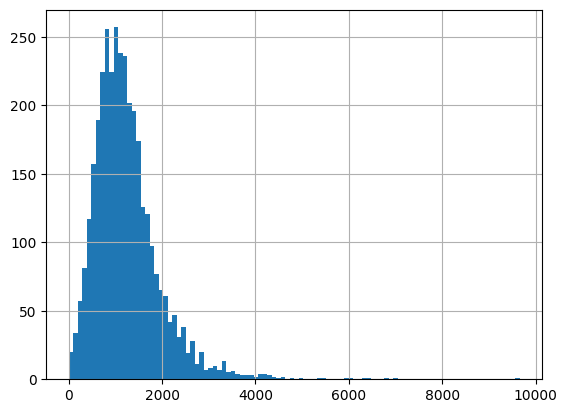

In [ ]:
scopus_all['abstract_len'] = scopus_all['abstract'].apply(len)
scopus_all['abstract_len'].hist(bins=100)

In [ ]:
#Inspecting the shortest abstracts
scopus_all.sort_values('abstract_len')[:10]

,title,Year,journal,citations,Link,abstract,abstract_len
1296,Analysis of the Near-Surface Layers of Lithium Coatings Using Laser Induced Breakdown Spectroscopy,2019,Physics of Atomic Nuclei,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85082404364&doi=10.1134%2fS106377881910020X&partnerID=40&md5=01e4e619a706d60dc30ffae02f7e0965,,0
1559,Criteria for the Existence of Ferry Vortex Singularities in Supersonic Conic Flows in the Absence of Branch Points of Shock Waves,2019,Doklady Physics,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85081020838&doi=10.1134%2fS1028335819120127&partnerID=40&md5=cc505c709d76f0ab66a619c4d1270123,,0
1692,Optical Materials and Fibers in Experiments on Pulsed Nuclear Reactors,2019,Physics of Atomic Nuclei,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85080125357&doi=10.1134%2fS1063778819080064&partnerID=40&md5=03f49f091e352c22b31c0a102b968e27,,0
1631,A-statistical convergence of order α via ϕ-function,2019,Applicable Analysis and Discrete Mathematics,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85080872936&doi=10.2298%2fAADM181218043S&partnerID=40&md5=305e3ca8f76ce381c32a8f8f68a1e067,,0
186,Well-posedness of Third Order Differential Equations in Hölder Continuous Function Spaces,2019,Canadian Mathematical Bulletin,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85106816570&doi=10.4153%2fS0008439518000048&partnerID=40&md5=490e625f20dc36debead49c435561a83,,0
1118,A Beaded Scarab in the Victoria and Albert Museum,2019,Journal of Egyptian Archaeology,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85083804921&doi=10.1177%2f0307513319899955&partnerID=40&md5=57baa83b68a0847e8e21b882aa98db09,,0
409,How many copies are enough revisited: Open access legal scholarship in the time of collection budget constraints,2019,Law Library Journal,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85091142940&partnerID=40&md5=0cdd0526c5c5be4e4997f2bb4afc7712,,0
1209,"On the existence results for (p, q)-Kirchhoff type systems with multiple parameters",2019,Jordan Journal of Mathematics and Statistics,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85082311348&partnerID=40&md5=5155d3fbd3887515004b0737330bbecc,,0
1777,Synthesis of Symmetrical N-(Het)aryl-C-phosphonoacetamidines,2019,Russian Journal of General Chemistry,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85079604269&doi=10.1134%2fS1070363219120119&partnerID=40&md5=b532ddf91be8bc6e14302294c8b96f47,,0
1877,Linear Conjugacy,2019,Canadian Mathematical Bulletin,0,https://www.scopus.com/inward/record.uri?eid=2-s2.0-85079487636&doi=10.4153%2fS0008439519000031&partnerID=40&md5=5a522f510b06e60791329bb849a0d28f,,0


In [ ]:
#Removing the row without an abstract
scopus_all = scopus_all[scopus_all['abstract_len'] > 100]

In [ ]:
scopus_all.iloc[26]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
scopus_all.shape

(3523, 7)

In [ ]:
scopus_all.to_csv('scopus all 16to19 final.csv', index=False)